# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

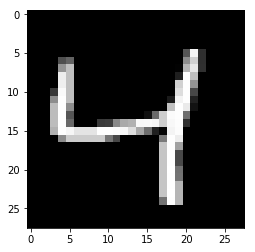

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size),name = 'inputs')
targets_ = tf.placeholder(tf.float32,  (None, image_size), name = 'tagets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim,activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation = None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name = 'output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_, logits = logits) 
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(loss)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6941
Epoch: 1/20... Training loss: 0.6908
Epoch: 1/20... Training loss: 0.6875
Epoch: 1/20... Training loss: 0.6838
Epoch: 1/20... Training loss: 0.6789
Epoch: 1/20... Training loss: 0.6730
Epoch: 1/20... Training loss: 0.6647
Epoch: 1/20... Training loss: 0.6572
Epoch: 1/20... Training loss: 0.6480
Epoch: 1/20... Training loss: 0.6354
Epoch: 1/20... Training loss: 0.6225
Epoch: 1/20... Training loss: 0.6090
Epoch: 1/20... Training loss: 0.5926
Epoch: 1/20... Training loss: 0.5763
Epoch: 1/20... Training loss: 0.5609
Epoch: 1/20... Training loss: 0.5421
Epoch: 1/20... Training loss: 0.5279
Epoch: 1/20... Training loss: 0.5100
Epoch: 1/20... Training loss: 0.4873
Epoch: 1/20... Training loss: 0.4720
Epoch: 1/20... Training loss: 0.4519
Epoch: 1/20... Training loss: 0.4372
Epoch: 1/20... Training loss: 0.4242
Epoch: 1/20... Training loss: 0.4040
Epoch: 1/20... Training loss: 0.3921
Epoch: 1/20... Training loss: 0.3770
Epoch: 1/20... Training loss: 0.3696
E

Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.2066
Epoch: 1/20... Training loss: 0.1992
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1956
E

Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1558
E

Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1358
E

Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1232
E

Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1103
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1189
E

Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1114
E

Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1027
E

Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1080
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1028
E

Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1042
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0979
E

Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0992
E

Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0954
E

Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0898
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0882
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0992
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0984
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0874
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0933


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

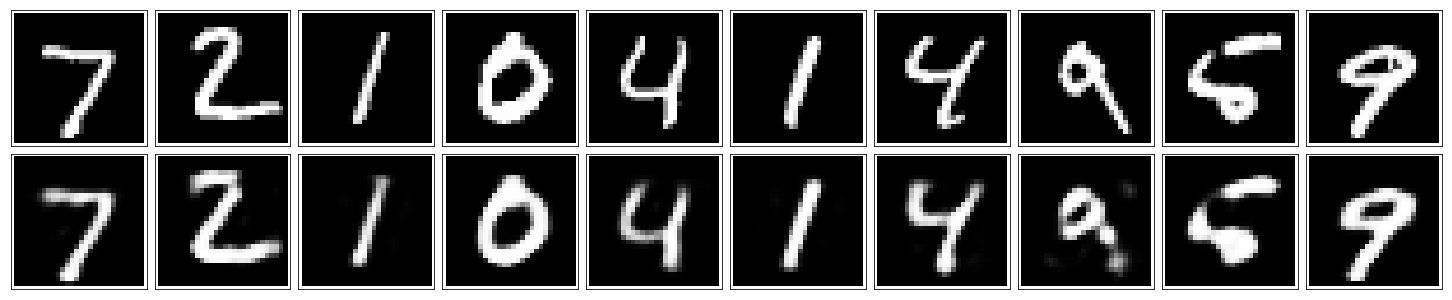

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.